# Aula 4 - parte2- Introdução ao Python para DataScientists

---

# Pandas

A Melhor forma é usar a linguagem para resolver um problema real. 
Vamos carregar dados de um *dataset* de preços de casas na califórnia para determinarmos: 

---

- Quantas casas existem abaixo de 200 000 Dollars 
- Quais os 2 locais onde as casas são mais baratas 


- Quais os melhores negócios (casas sub valorizadas) - Classificação/Regressão
- Quanto valeria uma casa na zona x, para 4 pessoas e com 200 $m^2$ ?  - Regressão

---

(Do conjunto de perguntas em cima, quais são perguntas de DataMining e quais são perguntas exploratórias (EDA - Exploratory Data Analysis))

<font color='forestgreen'>
O dataset que vamos descarregar é do SkLearn, manipula-lo de forma a obter algumas análises exploratórias dos dados (pre-datamining). 
</font>

### Como não estamos ainda preparados para resolver problemas de DataMining vamos focar-nos nos outros



## DataSet de Casas

In [3]:
# Start by importing some modules
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"done"

'done'

In [4]:
#import data to variable
data = datasets.california_housing.fetch_california_housing()

#show disorganized data
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [5]:
print("keys", data.keys())

keys dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [6]:
#first, let's print a description
print(data.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

O que podemos concluir da descrição das features?

R: Que são valores médios

In [7]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
# Quais as features de cada instancia?
MyFeatures = data.data

print("SHAPE: ", MyFeatures.shape)

MyFeatures

SHAPE:  (20640, 8)


array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
# Vamos criar um dataframe com base nestes dados
dframe = pd.DataFrame(data = data.data, columns=data.feature_names)
dframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



ou seja, obtemos algo semelhante a um "excel"

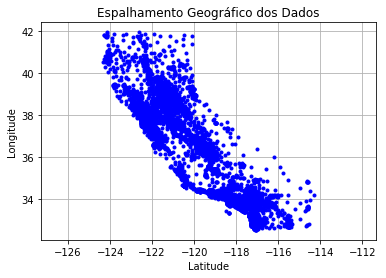

In [10]:
# Quão esparsos são estes dados:

plt.figure()
plt.title("Espalhamento Geográfico dos Dados")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.grid()
plt.axis('equal')
plt.plot(dframe.Longitude, dframe.Latitude,  '.', color="b")
plt.show()

## Comparando com o mapa da Califórnia

<img src="./images/calif.png" style="width:60%; margin-left:0px"/>


### Mas faltam os dados dos preços...

In [11]:
# Qual a classe de cada instancia?
MyClasses = data.target

print("SHAPE: ", MyClasses.shape)
print("TYPE: ", type(MyClasses))

MyClasses



SHAPE:  (20640,)
TYPE:  <class 'numpy.ndarray'>


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Mas temos um problema: O que será isto:  


`(20640,)`


In [12]:
print(data.data.shape)
print(data.target.shape)


(20640, 8)
(20640,)


É necessário transformar o array em 2D

In [13]:
print(data.target.reshape(-1,1))
print("SHAPE:", data.target.reshape(-1,1).shape)

[[4.526]
 [3.585]
 [3.521]
 ...
 [0.923]
 [0.847]
 [0.894]]
SHAPE: (20640, 1)


In [14]:
# Vamos concatenar as features e os targets

new_data =np.concatenate((data.data, data.target.reshape(-1,1)*100000), axis=1)

print("OLD SHAPE:",  data.data.shape, "NEW SHAPE", new_data.shape)

print(type(data.feature_names))
#para adicionar um valor a uma lista podmeos usar ".append" ou "[lista] + [2ª lista]". Vamos usar a segunda:

names = data.feature_names + ["Preços"]
print(names)

OLD SHAPE: (20640, 8) NEW SHAPE (20640, 9)
<class 'list'>
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Preços']


In [15]:
dframe = pd.DataFrame(data=new_data, columns=names)

dframe.head(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Preços
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,269700.0
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,299200.0
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,241400.0
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,226700.0
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,261100.0


# Exercícios usando a DataFrame

Relembrando as perguntas de hoje:
    
- Quantas casas existem abaixo de 200 000 Dollars
- Quais os 2 locais onde as casas são mais baratas

-----


### Usando o `.loc` com Pandas


In [16]:
dframe.loc[0:1,["MedInc","Preços"]]

,MedInc,Preços
0,8.3252,452600.0
1,8.3014,358500.0


In [17]:
dframe.loc[[True, False]*int(dframe.shape[0]/2.0) ,["MedInc","Preços"]][0:10]

,MedInc,Preços
0,8.3252,452600.0
2,7.2574,352100.0
4,3.8462,342200.0
6,3.6591,299200.0
8,2.0804,226700.0
10,3.2031,281500.0
12,3.0750,213500.0
14,1.9167,159200.0
16,2.7750,152500.0
18,1.9911,158700.0


In [18]:
dframe.loc[round(dframe.MedInc)==8 ,["MedInc","Preços"]][0:10]

,MedInc,Preços
0,8.3252,452600.0
1,8.3014,358500.0
126,7.5000,295200.0
128,7.5544,411500.0
134,8.2049,335200.0
135,8.4010,351200.0
137,8.3170,365900.0
154,8.1564,390100.0
158,7.5080,348700.0
362,7.6923,329800.0


In [19]:
[dframe.columns[1],dframe.columns[-1]]

# S[:10]

['HouseAge', 'Preços']

In [20]:
#pegando na nossa dframe...

small_price_data = dframe.loc[S, [dframe.columns[1],dframe.columns[-1]]]

small_price_data.head()

NameError: name 'S' is not defined

-----


### Pandas - Queries com `.loc`


In [23]:
# dframe["Preços"]<200000

houses_below = dframe.loc[dframe["Preços"]<200000,:]
houses_below[:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Preços
13,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.84,-122.26,191300.0
14,1.9167,52.0,4.262903,1.009677,1212.0,1.954839,37.85,-122.26,159200.0
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,140000.0
16,2.7750,52.0,5.939577,1.048338,793.0,2.395770,37.85,-122.27,152500.0
17,2.1202,52.0,4.052805,0.966997,648.0,2.138614,37.85,-122.27,155500.0
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,158700.0
19,2.6033,52.0,5.465455,1.083636,690.0,2.509091,37.84,-122.27,162900.0
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27,147500.0
21,1.7135,42.0,4.478142,1.002732,929.0,2.538251,37.85,-122.27,159800.0
22,1.7250,52.0,5.096234,1.131799,1015.0,2.123431,37.84,-122.27,113900.0


-----


### Usando o `.iloc` com Pandas

In [24]:
B = dframe.iloc[:9,[0,-1]]
B

,MedInc,Preços
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
5,4.0368,269700.0
6,3.6591,299200.0
7,3.1200,241400.0
8,2.0804,226700.0


In [25]:
# Outra forma, mais python

indexes = [i for i,j in enumerate(dframe["Preços"]) if j<200000]
#print(indexes)
small_price_data = dframe.iloc[indexes, :]
small_price_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Preços
13,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.84,-122.26,191300.0
14,1.9167,52.0,4.262903,1.009677,1212.0,1.954839,37.85,-122.26,159200.0
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,140000.0
16,2.7750,52.0,5.939577,1.048338,793.0,2.395770,37.85,-122.27,152500.0
17,2.1202,52.0,4.052805,0.966997,648.0,2.138614,37.85,-122.27,155500.0
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,158700.0
19,2.6033,52.0,5.465455,1.083636,690.0,2.509091,37.84,-122.27,162900.0
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27,147500.0
21,1.7135,42.0,4.478142,1.002732,929.0,2.538251,37.85,-122.27,159800.0
22,1.7250,52.0,5.096234,1.131799,1015.0,2.123431,37.84,-122.27,113900.0


### Quantas casas existem abaixo de 200 000 Dollars ?

In [26]:
houses_below.iloc[:,-1].mean()
houses_below.count()

MedInc        11885
HouseAge      11885
AveRooms      11885
AveBedrms     11885
Population    11885
AveOccup      11885
Latitude      11885
Longitude     11885
Preços        11885
dtype: int64

### Quais os 2 locais onde as casas são mais baratas?

In [27]:
# dframe
dframe.sort_values("Preços").iloc[0:2,:]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Preços
9188,4.1932,52.0,3.568889,1.186667,628.0,2.791111,34.24,-117.86,14999.0
19802,0.5360,36.0,12.250000,3.500000,18.0,2.250000,40.31,-123.17,14999.0


### Falta-nos ainda perceber para que servem os indíces....

# Mais informação para melhorar a aula da hoje (e fazer os TPCs):
    
- python: http://docs.python-guide.org/en/latest/
- numpy: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
- pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html

# Exercicios


#### Dado o presente dataset determiar 

- Qual o preço maximo, minimo e médio
- qual a média da população do dataset
- qual a média do número de quartos para ocupações médias de 1,2,3,4 e 5 pessoas
- que preços médios existem para casas de 20-25, 30-25 e 40-25 anos de idade (intervalos de valores)



